<a href="https://colab.research.google.com/github/darshandugar2004/XrayImageClassification-TransferLearning/blob/main/cov_pne_tb_nor_model_training_CNN.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import os
import cv2
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

dataset_path = "/kaggle/input/3in1-chest-x-raycovid-pneumonia-tb/3in1-Chest-X-ray(COVID, PNEUMONIA, TB)"

# Listing images
covid_path = os.path.join(dataset_path, "COVID-19")
normal_path = os.path.join(dataset_path, "NORMAL")
pne_path = os.path.join(dataset_path, "PNEUMONIA")
tb_path = os.path.join(dataset_path,"TUBERCULOSIS")

covid_urls = os.listdir(covid_path)
normal_urls = os.listdir(normal_path)
pne_urls = os.listdir(pne_path)
tb_urls = os.listdir(tb_path)

print(f"COVID Images: {len(covid_urls)}")
print(f"Normal Images: {len(normal_urls)}")
print(f"Pneumonia Images: {len(pne_urls)}")
print(f"Tb Images: {len(tb_urls)}")


COVID Images: 5689
Normal Images: 12289
Pneumonia Images: 5618
Tb Images: 3194


In [ ]:
def loadImages(path, urls, target):
  images = []
  labels = []
  for i in range(len(urls)):
    img_path = path + "/" + urls[i]
    img = cv2.imread(img_path)
    img = img / 255.0
    #print(img_path)
    # if we want to resize the images
    img = cv2.resize(img, (100, 100))
    images.append(img)
    labels.append(target)
  images = np.asarray(images)
  return images, labels
covid_path = "/kaggle/input/3in1-chest-x-raycovid-pneumonia-tb/3in1-Chest-X-ray(COVID, PNEUMONIA, TB)/COVID-19"
covidUrl = os.listdir(covid_path)
covidImages, covidTargets = loadImages(covid_path, covidUrl, 0)
len(covidUrl), len(covidImages)

(5689, 5689)

In [ ]:
normal_path = "/kaggle/input/3in1-chest-x-raycovid-pneumonia-tb/3in1-Chest-X-ray(COVID, PNEUMONIA, TB)/NORMAL"
normal_urls = os.listdir(normal_path)
normalImages, normalTargets = loadImages(normal_path, normal_urls, 1)

In [ ]:
pne_path = "/kaggle/input/3in1-chest-x-raycovid-pneumonia-tb/3in1-Chest-X-ray(COVID, PNEUMONIA, TB)/PNEUMONIA"
pne_urls = os.listdir(pne_path)
pneImages, pneTargets = loadImages(pne_path, pne_urls, 2)

In [ ]:
tb_path = "/kaggle/input/3in1-chest-x-raycovid-pneumonia-tb/3in1-Chest-X-ray(COVID, PNEUMONIA, TB)/TUBERCULOSIS"
tb_urls = os.listdir(tb_path)
tbImages, tbTargets = loadImages(tb_path, tb_urls, 3)

In [ ]:
data = np.r_[covidImages, normalImages,pneImages,tbImages]
targets = np.r_[covidTargets,normalTargets,pneTargets, tbTargets]

In [ ]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(data, targets, test_size=0.25)

In [ ]:
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense

In [ ]:
from tensorflow.keras.utils import to_categorical

num_classes = len(np.unique(y_train))
y_train = to_categorical(y_train, num_classes)
y_test = to_categorical(y_test, num_classes)

model = Sequential([
    Conv2D(32, 3, input_shape=(100,100,3), activation='relu'),
    MaxPooling2D(),
    Conv2D(16, 3, activation='relu'),
    MaxPooling2D(),
    Conv2D(16, 3, activation='relu'),
    MaxPooling2D(),
    Flatten(),
    Dense(512, activation='relu'),
    Dense(256, activation='relu'),
    Dense(num_classes, activation='softmax')  # Change for multi-class
])



model.summary()

model.compile(optimizer='adam',
              loss='categorical_crossentropy',
              metrics=['accuracy', tf.keras.metrics.Precision(), tf.keras.metrics.Recall()])

/usr/local/lib/python3.10/dist-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ conv2d (Conv2D)                      │ (None, 98, 98, 32)          │             896 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d (MaxPooling2D)         │ (None, 49, 49, 32)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_1 (Conv2D)                    │ (None, 47, 47, 16)          │           4,624 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_1 (MaxPooling2D)       │ (None, 23, 23, 16)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_2 (Conv2D)                    │ (None, 21, 21, 16)          │           2,320 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_2 (MaxPooling2D)       │ (None, 10, 10, 16)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ flatten (Flatten)                    │ (None, 1600)                │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense (Dense)                        │ (None, 512)                 │         819,712 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_1 (Dense)                      │ (None, 256)                 │         131,328 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_2 (Dense)                      │ (None, 4)                   │           1,028 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 959,908 (3.66 MB)

 Trainable params: 959,908 (3.66 MB)

 Non-trainable params: 0 (0.00 B)

In [ ]:
model.fit(x_train, y_train,batch_size=32,epochs=8,validation_data=(x_test, y_test))

Epoch 1/8
628/628 ━━━━━━━━━━━━━━━━━━━━ 21s 22ms/step - accuracy: 0.7227 - loss: 0.6779 - precision: 0.7877 - recall: 0.6233 - val_accuracy: 0.8758 - val_loss: 0.3365 - val_precision: 0.8918 - val_recall: 0.8594
Epoch 2/8
628/628 ━━━━━━━━━━━━━━━━━━━━ 5s 9ms/step - accuracy: 0.8808 - loss: 0.3139 - precision: 0.8905 - recall: 0.8705 - val_accuracy: 0.9042 - val_loss: 0.2601 - val_precision: 0.9124 - val_recall: 0.8977
Epoch 3/8
628/628 ━━━━━━━━━━━━━━━━━━━━ 5s 9ms/step - accuracy: 0.9054 - loss: 0.2452 - precision: 0.9104 - recall: 0.8993 - val_accuracy: 0.8882 - val_loss: 0.2841 - val_precision: 0.8943 - val_recall: 0.8819
Epoch 4/8
628/628 ━━━━━━━━━━━━━━━━━━━━ 5s 9ms/step - accuracy: 0.9200 - loss: 0.2052 - precision: 0.9235 - recall: 0.9159 - val_accuracy: 0.9221 - val_loss: 0.2060 - val_precision: 0.9254 - val_recall: 0.9182
Epoch 5/8
628/628 ━━━━━━━━━━━━━━━━━━━━ 6s 9ms/step - accuracy: 0.9361 - loss: 0.1637 - precision: 0.9396 - recall: 0.9334 - val_accuracy: 0.9410 - val_loss: 0.168

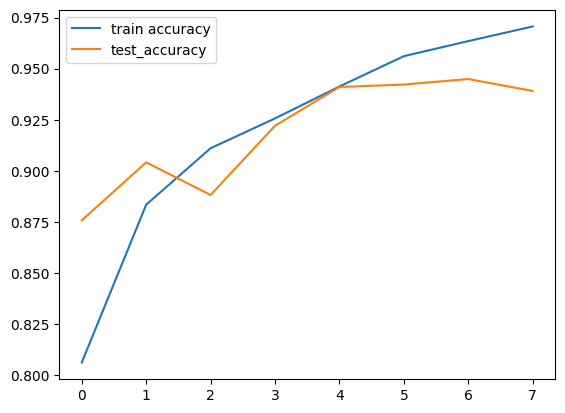

In [ ]:
plt.plot(model.history.history['accuracy'], label = 'train accuracy')
plt.plot(model.history.history['val_accuracy'],label = 'test_accuracy')
plt.legend()
plt.show()


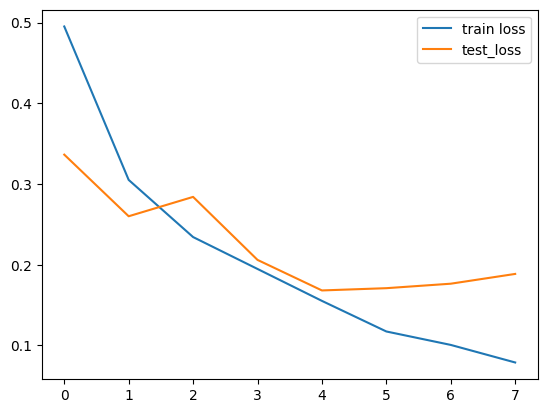

In [ ]:
plt.plot(model.history.history['loss'], label = 'train loss')
plt.plot(model.history.history['val_loss'],label = 'test_loss')
plt.legend()
plt.show()

In [ ]:
model.save('covid_tb_normal_pne.h5')

In [ ]:
results = model.evaluate(x_test, y_test, verbose=1)

# Extract loss, accuracy, precision, and recall
loss, accuracy, precision, recall = results

# Print results
print(f"Loss: {loss:.4f}, Accuracy: {accuracy:.4f}, Precision: {precision:.4f}, Recall: {recall:.4f}")


210/210 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - accuracy: 0.9356 - loss: 0.1915 - precision: 0.9370 - recall: 0.9346
Loss: 0.1887, Accuracy: 0.9391, Precision: 0.9404, Recall: 0.9379
